# Interviews With Clothes & (C10H8O4)n
Creative coding for 7585, Helsinki Fashion Week and future projects. Exploring the pathetic fallecy, via interviews and code. 

![plastic_image](./plastic.png)


### Links
- [Notion](https://www.notion.so/johnmalc/IWC-Plastic-Organism-C10H8O4-9102bfe4e8d448529bb75b0a2a1e3376) (Add GDrive & CC)
- Github TBA
- Database TBA

## Imports, Inits & Sessions

In [140]:
## Data Science
import re # Regex
import markdown # Markdown 
from bs4 import BeautifulSoup # HTML 
import rsa # RSA
import binascii # Cryptographic (needs pycryptodome)
import pandas as pd
import numpy as np

import geopandas as gpd
import osmnx as ox

%matplotlib inline

In [36]:
## Amazon Web Services
from boto3 import Session # AWS Session
from botocore.exceptions import BotoCoreError, ClientError # AWS Errors
from contextlib import closing # https://docs.python.org/3/library/contextlib.html#contextlib.closing

session = Session(profile_name="default") # Using ~/.aws/
polly = session.client("polly")

In [141]:
## System 
import os # Operating System
import sys # Python Runtime
import subprocess # New Process/ Program
from tempfile import gettempdir # Tempdir 

In [4]:
## Create 15 RSA keys
num = 15
keys = []
for x in range(num):
    # Generate key and message
    (pubkey, privkey) = rsa.newkeys(512, poolsize=16) 
    keys.append([pubkey, privkey])

In [142]:
## Interview Transcript Markdown to HTML
with open('interview.md', 'r') as f:
    text = f.read()
    html = markdown.markdown(text)
soup = BeautifulSoup(html, 'html.parser')

## Define Functions

In [143]:
# Extract & Encrypt Functions
def create_arrays(tag, list_clean, list_enc, index_var):        
    # Append answer to name list 
    list_clean.append(tag.get_text()) 

    # Search for text to encode
    if tag.find('code'):
        # create function for code insert
        encoded_answer = encrypt(tag.code.get_text(), index_var)
        list_enc.append(encoded_answer)
    else:
        list_enc.append(tag.get_text())

    # Update cryptographic index
    index_var = index_var + 1

def encrypt(text, index):
    crypto = rsa.encrypt(text.encode('utf8'), keys[index][0])
    crypto_str = str(binascii.hexlify(crypto))
    newstr = re.sub("<code>(.*?)</code>", crypto_str, str(element.ul.li))
    newstr = newstr.replace('<li>', '') 
    newstr = newstr.replace('</li>', '') 
    return newstr

## Extract Interview Data

In [144]:
names = []

# Transcript Arrays
ans_name = []
ans_desc = []
ans_from = []
ans_after = []
# TBA - Care Data
species = []
locations = []

# Coded Transcript Arrays
ans_name_enc = []
ans_desc_enc = []
ans_from_enc = []
ans_after_enc = []
# TBA - Enc Care Data
enc_species = []
enc_locations = []

index_name = 0
index_desc = 0
index_from = 0
index_after = 0

# Create names array
for x in soup.find_all("h3"):
    name = re.search("_(.*?).mp3", x.text)
    names.append(name.group(1))

for element in soup.find_all("li"):    
    if 'What is your name?' in element.get_text():
        create_arrays(element.ul.li, ans_name, ans_name_enc, index_name)
            
    if 'How would you describe yourself?' in element.get_text():
        create_arrays(element.ul.li, ans_desc, ans_desc_enc, index_desc)
        
    if 'Where are you from?' in element.get_text():
        create_arrays(element.ul.li, ans_from, ans_from_enc, index_from)
        
    if 'Whats your plan when you are done with your current position?' in element.get_text():
        create_arrays(element.ul.li, ans_after, ans_after_enc, index_after)
        
    if 'Conversation' in element.get_text():
        el = element.ul.li.get_text()
        cleaned = re.search("Species : \[(.*?)\]", el)
        species.append(cleaned.group(1))
        
    if 'Conversation' in element.get_text():
        el = element.ul
        cleaned = re.search("Location : \[(.*?)\]", el.get_text())
        locations.append(cleaned.group(1))

## Create Data Frame

In [157]:
available_voices = polly.describe_voices()
voices = ['Geraint', 'Brian', 'Amy', 'Matthew', 'Salli', 'Joey', 'Matthew', 'Ivy', 
          'Kendra', 'Kimberly', 'Aditi', 'Justin', 'Kendra', 'Nicole', 'Russell']

np_names = np.array(names)
np_voices = np.array(voices)
np_ans_name = np.array(ans_name)
np_ans_desc = np.array(ans_desc)
np_ans_from = np.array(ans_from)
np_ans_after = np.array(ans_after)
np_species = np.array(species) 
np_location = np.array(locations) 

dataset = pd.DataFrame({'things_name': np_names, 
                        'ans_name': np_ans_name, 
                        'ans_desc': np_ans_desc,
                        'ans_from': np_ans_from,
                        'ans_after': np_ans_after,
                        'species': np_species,
                        'location': np_location,
                        'voice': np_voices},
                       columns=['things_name', 'ans_name', 'ans_desc', 'ans_from', 'ans_after', 'species', 'location', 'voice'])

In [158]:
dataset

,things_name,ans_name,ans_desc,ans_from,ans_after,species,location,voice
0,Lina,"Lina, nice to meet you.","An everyday go to, people put me on when they ...",I started off as what humans call an “impulse ...,We have not really thought that far. So far th...,Black Coat,"60.1717307, 24.9455533",Geraint
1,MD-75,You are the first person in my life to ask me ...,"I’m very committed, very durable, very comfort...",Italy.,"I am not a polyamorous person, I am more one l...",Avant Garde Pants (Low Crotch),"52.514561, 13.498310",Brian
2,Rosie,Rosie.,Sleek and enduring.,"I was born in the 1940s in Germany, there was ...","I want to be on display, not a charity shop.",Snakeskin Bag (Circa 1940),"55.950191, -3.187550",Amy
3,Muhammed,Muhammed,I look like something a waiter might wear. Im ...,Zanzibar,Im going to try make my way to the great pacif...,Shirt,"47.376888, 8.541694",Matthew
4,Sexy,Sexy,"Elegant, flows. I pinch in at the waist which ...",Ireland,The next stage of my existence will probably t...,Black Dress,"53.435581, -6.122380",Salli
5,Black-T-Shirt,Black T-Shirt,"Boring, plain, but convenient. I am one of 15 ...",Dunnes Stores,"Into a bin bag, and then into the back of a ci...",T-Shirt,"53.2785557,-8.9705897",Joey
6,Josie,Josie,"I’m a random, aggressive person. Always happy.",South America,Tomato farmer.,T-Shirt,"40.421094, -3.707158",Matthew
7,Eloise,Eloise,"Dainty and sensitive, i’m a very bubbly and in...","From the US, but i’m more English.",I will continue to bring dreamy nature vibes d...,Vintage Pink Top,"60.159019, 24.951319",Ivy
8,Danielle,Daniel,"I am very sunny, i look very dark but I am act...",I am from Finland. I think. I don’t remember a...,I will have some children and then grand bags ...,Hand Bag,"60.159116, 24.947578",Kendra
9,Unnamed,"I don’t have a name, i’m just a black hoodie c...","I’m very soft and easy going, maybe a little a...",I was given to my owner by our neighbour who h...,I will probably be worn till i’m not wearable ...,Comfort Hoodie,"60.154199, 24.942874",Kimberly


## Generate MP3s using Amazon Polly

In [139]:
for index, row in dataset.iterrows():
    col_names = dataset.columns.values.tolist()
    col_index = 0
    # Directory
    directory = row.things_name

    # Parent Directory path
    parent_dir = '/Users/john.anderson/dev/audio/'

    # Path
    path = os.path.join(parent_dir, directory)

    # Create the directory
    # 'GeeksForGeeks' in
    # '/home / User / Documents'
    os.mkdir(path)
    
    for col in row:
        col_index = col_index + 1
        try:
            # Request speech synthesis
            response = polly.synthesize_speech(Text=col, OutputFormat="mp3", VoiceId=row.voice)
        except (BotoCoreError, ClientError) as error:
            # The service returned an error, exit gracefully
            print(error)
            sys.exit(-1)

            # Access the audio stream from the response
        if "AudioStream" in response:
            # Note: Closing the stream is important because the service throttles on the
            # number of parallel connections. Here we are using contextlib.closing to
            # ensure the close method of the stream object will be called automatically
            # at the end of the with statement's scope.
                with closing(response["AudioStream"]) as stream:
                    output = os.path.join(parent_dir + directory, col_names[col_index -1] + ".mp3")

                    try:
                    # Open a file for writing the output as a binary stream
                        with open(output, "wb") as file:
                           file.write(stream.read())
                    except IOError as error:
                      # Could not write to file, exit gracefully
                      print(error)
                      sys.exit(-1)

        else:
            # The response didn't contain audio data, exit gracefully
            print("Could not stream audio")
            sys.exit(-1)

        # Play the audio using the platform's default player
        if sys.platform == "win32":
            os.startfile(output)
        else:
            # The following works on macOS and Linux. (Darwin = mac, xdg-open = linux).
            opener = "open" if sys.platform == "darwin" else "xdg-open"
            subprocess.call([opener, output])

## Generate Maps using OSMnx

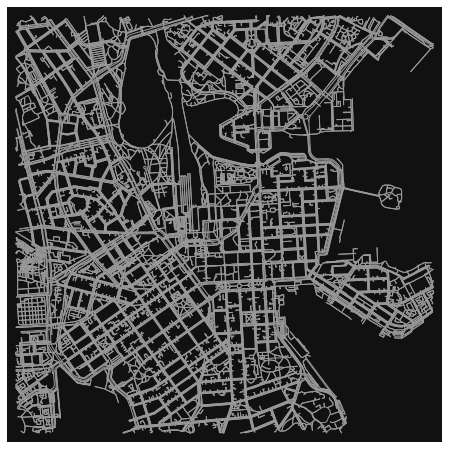

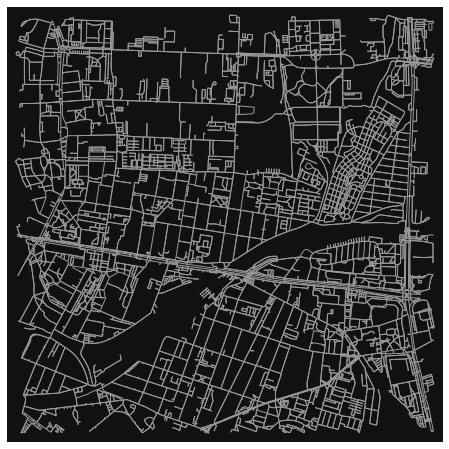

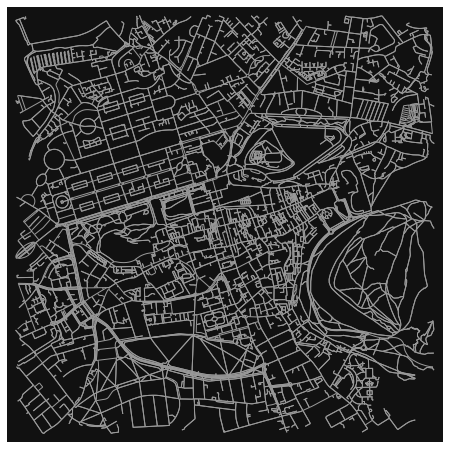

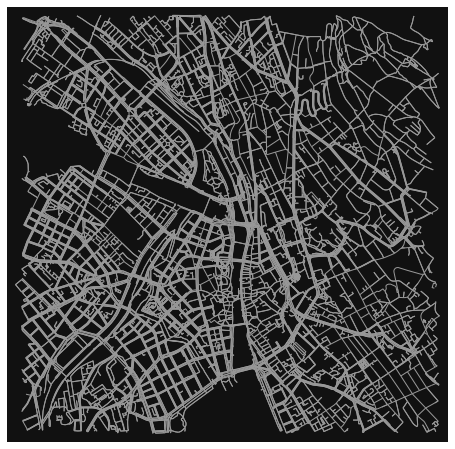

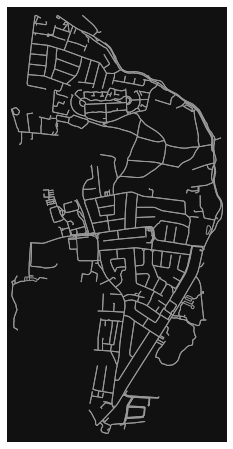

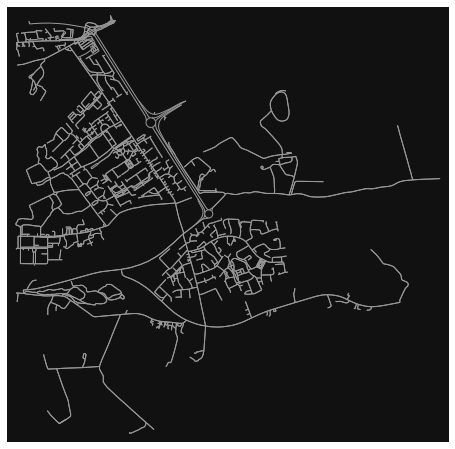

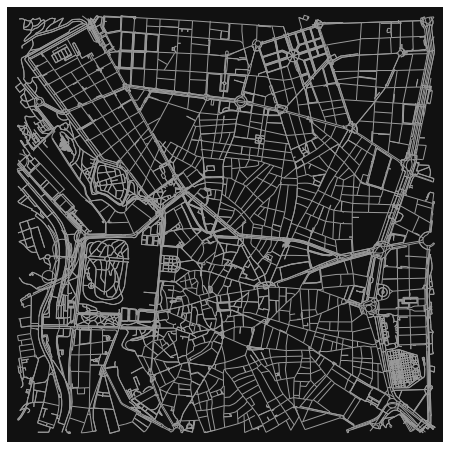

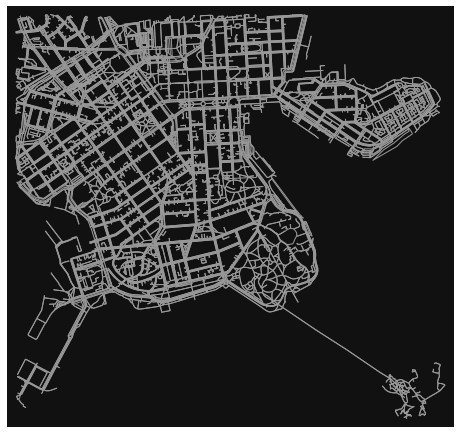

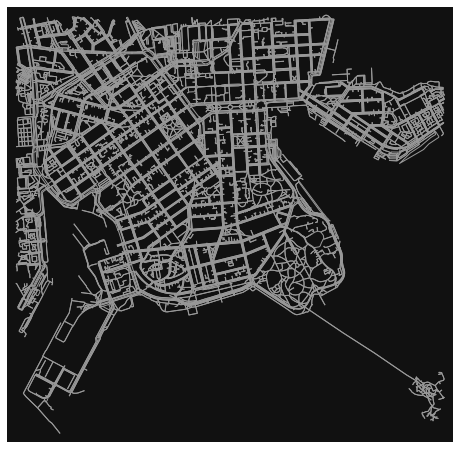

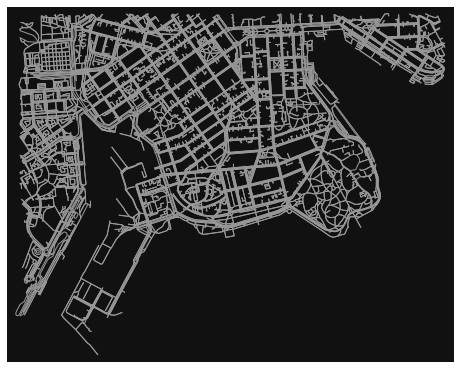

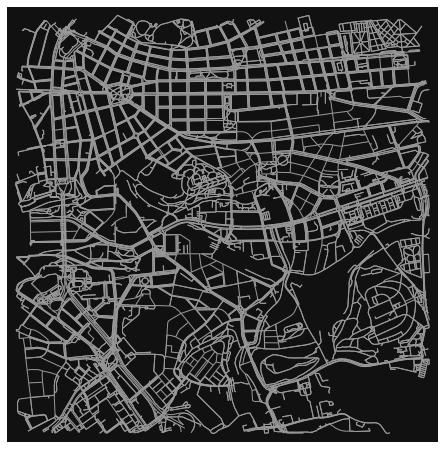

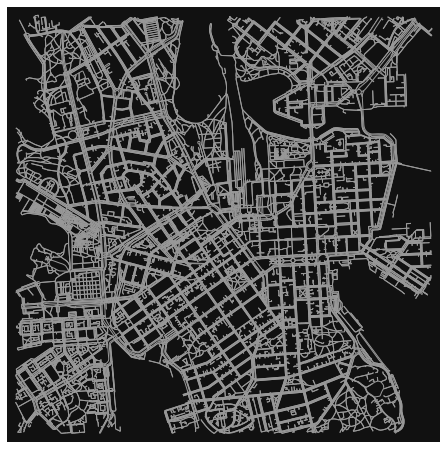

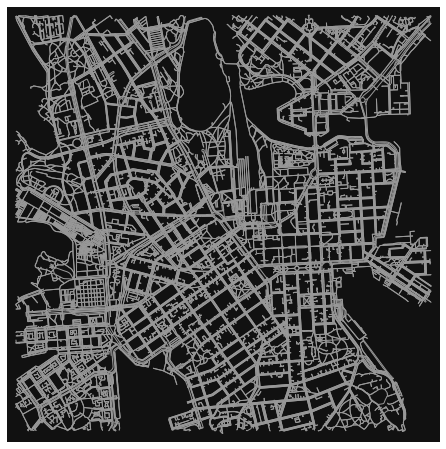

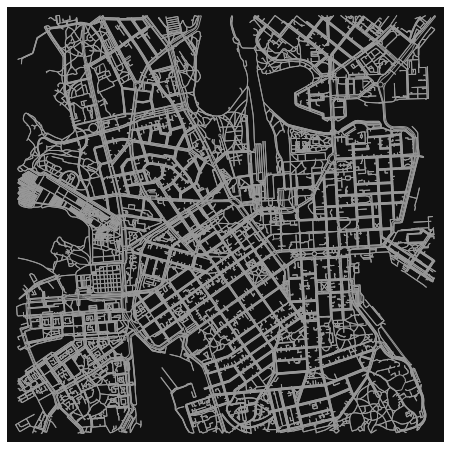

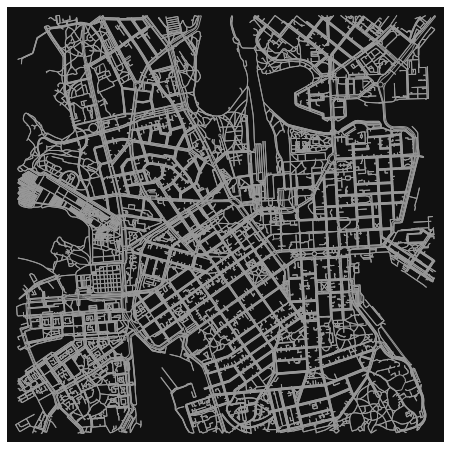

In [196]:
for index, row in dataset.iterrows():
    lat_long_array = row.location.split(',')
    location_01 = (float(lat_long_array[0]), float(lat_long_array[1]))
    one_mile = 1609  # meters
    G = ox.graph_from_point(location_01, dist=one_mile, network_type="all")
    fig, ax = ox.plot_graph(G, node_size=0, show=False, save=True, close=True, filepath="./"+row.things_name+".svg")